# Medical Appointments Exploratory Data Analysis with Python
Data Analysis Project — Udacity Data Analyst Nanodegree

This project belongs to Udacity's [Data Analyst Nanodegree](https://eu.udacity.com/course/data-analyst-nanodegree--nd002). Below you'll find links to the rest of the Nanodegree projects. 

* [Intro to data analysis](https://github.com/AdrianVeraRos/Python-Medical-appointments-EDA)
* [Exploratory data analysis](https://github.com/AdrianVeraRos/R-White-wine-EDA)
* [Data wrangling](https://github.com/AdrianVeraRos/OpenStreetMap-Peru-Lima)
* [Machine learning](https://github.com/AdrianVeraRos/Enron-Fraud-Identification)
* [Data visualization](https://public.tableau.com/profile/adrian.vera.ros#!/vizhome/Flightdelaycausesfinal/Story1)

This project was developed in 2018 and it is no longer maintained. If you have any trouble opening the files please contact me at my [LinkedIn profile](https://www.linkedin.com/in/adrianveraros/) 


## About
What makes people scheduling a medical appointment but not going?

The following dataset is composed by more than 110.475 medical appointments made in the city of Vitória, in the state of Spirito Santo (Brazil) between the 29th of April and the 8th of June 2016.

Around 20% of the people didn't showed up for the scheduled appointments, but is there any specific reason to it? Can we pinpoint the most important factors to know if someone will showup or not?


The findings here represented are tentative.

# 1. Preparing and cleaning the data
## 1.1 Data Preparation

In [1]:
#import libraries

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_profiling

C:\Users\Adrian\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Adrian\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Adrian\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Adrian\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
# Reading and showing head data
medapp = pd.read_csv("noshowappointments.csv")
medapp.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
for time in 


ScheduledHour = pd.to_datetime(medapp.ScheduledDay).split('T')

print(ScheduledHour)

AttributeError: 'Series' object has no attribute 'split'

In [5]:
medapp['ScheduledDay']

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
5         2016-04-27T08:36:51Z
6         2016-04-27T15:05:12Z
7         2016-04-27T15:39:58Z
8         2016-04-29T08:02:16Z
9         2016-04-27T12:48:25Z
10        2016-04-27T14:58:11Z
11        2016-04-26T08:44:12Z
12        2016-04-28T11:33:51Z
13        2016-04-28T14:52:07Z
14        2016-04-28T10:06:24Z
15        2016-04-26T08:47:27Z
16        2016-04-28T08:51:47Z
17        2016-04-28T09:28:57Z
18        2016-04-26T10:54:18Z
19        2016-04-29T10:43:14Z
20        2016-04-27T07:51:14Z
21        2016-04-27T10:50:45Z
22        2016-04-25T13:29:16Z
23        2016-04-28T10:27:05Z
24        2016-04-29T14:19:19Z
25        2016-04-26T15:04:17Z
26        2016-04-29T14:19:42Z
27        2016-04-27T10:51:45Z
28        2016-04-29T15:48:02Z
29        2016-04-29T15:16:29Z
                  ...         
110497    2016-06-01T09:46:33Z
110498  

In [4]:
pandas_profiling.ProfileReport(medapp)

Number of variables,14
Number of observations,110527
Total Missing (%),0.0%
Total size in memory,11.8 MiB
Average record size in memory,112.0 B
Numeric,4
Categorical,5
Boolean,5
Date,0
Text (Unique),0
Rejected,0


## We can see in the table above the following problems
1. Patient ID is registered as an exponential number
2. ScheduledDay and AppointmentDay are not in the correct date format 
3. AppointmentDay time is always 00:00, which makes impossible the compare attendance related to time of the day.
4. Some name columns are wrong ("handcap"). 
5. "No-show = No" means that they indeed went to the appointed date, which makes the column prone to missinterpretation. 

In [33]:
#Patient ID Format:

pd.options.display.float_format = '{:.2f}'.format
medapp['PatientId'] = medapp['PatientId'].apply(np.int64)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [34]:
# ScheduledDay and AppointmentDay Format: 

medapp.ScheduledDay = medapp.ScheduledDay.apply(np.datetime64)
medapp.AppointmentDay = medapp.AppointmentDay.apply(np.datetime64)
medapp.ScheduledDay = medapp.ScheduledDay.apply(pd._libs.tslib.normalize_date)
medapp["Days_to_Appointment"] = medapp.AppointmentDay - medapp.ScheduledDay
medapp.Days_to_Appointment = medapp.Days_to_Appointment.dt.days.astype(int)
medapp.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_to_Appointment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [5]:
# Separating the waiting time in bins. First value (-1) to include 0 (same day appointments)

waitbins = [-1, 2, 7, 14, 30, 90, 180]
waitlabels = ["Urgent", "Week","Two_Weeks", "Month", "Trimester", "Half_year"]
wait_period = pd.cut(medapp['Days_to_Appointment'], waitbins, labels=waitlabels)
medapp['Wait_period'] = wait_period

In [6]:
# Separating the waiting time in bins. First value (-1) to include 0 (same day appointments)

waitbins = [-1, 5, 12, 18, 35, 60, 180]
waitlabels = ["Babies and toddlers", "Children","Teen", "Young Adults", "Adults", "Senior"]
binned_age = pd.cut(medapp['Age'], waitbins, labels=waitlabels)
medapp['Binned_age'] = binned_age

In [7]:
# We add a column that represents the weekday for the appointed date 

medapp["Appointment_weekday"] = medapp.AppointmentDay.dt.weekday

In [8]:
# Changing values in no-show column for more clarity:

medapp.loc[medapp["No-show"] =="No", 'No-show'] = "1"
medapp.loc[medapp["No-show"] =="Yes", 'No-show'] = "0"

In [9]:
# medapp.rename(index=str, columns={"No-show": "Show"})

In [10]:
# changing columns order: 

medapp = medapp[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 
                   'Days_to_Appointment', 'Wait_period', 'Appointment_weekday', 'Age', 'Binned_age', 'Neighbourhood', 
                   'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',  'SMS_received', 'No-show']]

In [11]:
#Changing name in columns:

medapp.columns = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 
                   'Days_to_Appointment', 'Wait_period', 'Appointment_weekday', 'Age', 'Binned_age', 'Neighbourhood', 
                   'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap_level', 'SMS_received', 'Show']

In [12]:
medapp.Show = medapp.Show.astype(int)

In [13]:
pandas_profiling.ProfileReport(medapp)

Number of variables,18
Number of observations,110527
Total Missing (%),0.0%
Total size in memory,12.9 MiB
Average record size in memory,122.0 B
Numeric,6
Categorical,4
Boolean,6
Date,2
Text (Unique),0
Rejected,0


## 1.2 Checking for Errors, NaNs and outliers

In [14]:
#We print the unique data in order to find possible outliers, errors and to better understand the data structure

print('Age:',sorted(medapp.Age.unique()))
print('Appointment_weekday:',sorted(medapp.Appointment_weekday.unique()))
print('Days_to_Appointment:',sorted(medapp.Days_to_Appointment.unique()))
print('Gender:',medapp.Gender.unique())
print('Diabetes:',medapp.Diabetes.unique())
print('Alcoholism:',medapp.Alcoholism.unique())
print('Hypertension:',medapp.Hypertension.unique())
print('Handicap_level:',medapp.Handicap_level.unique())
print('Scholarship:',medapp.Scholarship.unique())
print('SMS_received:',medapp.SMS_received.unique())
print('Neighbourhood:',sorted(medapp.Neighbourhood.unique()))
print('Show:',medapp.Show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Appointment_weekday: [0, 1, 2, 3, 4, 5]
Days_to_Appointment: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155,

## We can make the following observations:
1. Ages on the dataset range from -1 to 115, which means we will have to check for possible outliers in our dataset.
2. Something similar happens with the days to appointment: some appointemts were booked after they happened.
3. Handicap is ranged from 0 to 4. Consulting the dataset documentation we can find that Handicap not only represents if they have a handicap or not, but the number of them (for instance, blind and paralyzed = 2). 
4. Appointment_weekday is ranged from 0 to 5, where 0 is Monday and 5 is Saturday. We will keep this format to make it easier later graphic representations.
5. There's no NaNs (Not a Number, or missing parameters) in this dataset

### To find outliers we are going to count the number of times the data is repeated

In [15]:
print(medapp['Age'].value_counts().sort_index())
print(medapp['Days_to_Appointment'].value_counts().sort_index())
print(medapp['Appointment_weekday'].value_counts().sort_index())
print(medapp['Binned_age'].value_counts().sort_index())

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64
-6          1
-1          4
 0      38563
 1       5213
 2       6725
 3       2737
 4       5290
 5       3277
 6       4037
 7       4906
 8       2332
 9       1605
 1

We found out that there's only one -1 years old patient, so we can cross it as an error. On the other hand, life expectancy in Brazil in 2015 was 75 years old, which is far from the top age of 115 years.  For that reason, we are going to restrict the data between age 0 and 100.

We are going to avoid as well data of appointments booked after they happened.



In [16]:
medapp.Appointment_weekday = medapp.Appointment_weekday.astype(str)
medapp.loc[medapp['Appointment_weekday'] == "5"]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Days_to_Appointment,Wait_period,Appointment_weekday,Age,Binned_age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap_level,SMS_received,Show
72295,9656743739937,5647188,F,2016-05-02,2016-05-14,12,Two_Weeks,5,60,Adults,SANTO ANTÔNIO,0,0,0,0,0,1,1
72296,261246839673951,5692771,M,2016-05-12,2016-05-14,2,Urgent,5,56,Adults,CARATOÍRA,0,0,0,0,0,0,0
72297,62197183951413,5668696,F,2016-05-06,2016-05-14,8,Two_Weeks,5,27,Young Adults,CARATOÍRA,1,0,0,0,0,1,1
72298,1715927721832,5646878,M,2016-05-02,2016-05-14,12,Two_Weeks,5,75,Senior,CARATOÍRA,0,1,1,0,0,0,1
72299,61824462897921,5673055,F,2016-05-09,2016-05-14,5,Week,5,67,Senior,CARATOÍRA,0,0,0,0,0,1,1
72300,4494621843431,5674445,F,2016-05-09,2016-05-14,5,Week,5,72,Senior,CARATOÍRA,0,1,1,0,0,1,1
72301,63556226728883,5674448,M,2016-05-09,2016-05-14,5,Week,5,52,Adults,CARATOÍRA,0,0,1,0,0,1,1
72302,59671168441693,5646085,M,2016-05-02,2016-05-14,12,Two_Weeks,5,31,Young Adults,ARIOVALDO FAVALESSA,0,0,0,0,1,1,1
72303,67167685484615,5646088,F,2016-05-02,2016-05-14,12,Two_Weeks,5,52,Adults,ARIOVALDO FAVALESSA,0,0,0,0,0,0,1
72304,7367167111123,5678814,F,2016-05-10,2016-05-14,4,Week,5,58,Adults,CARATOÍRA,0,0,0,0,0,1,1


Only 39 appointments of over 110.000 (0.035%) were on Saturdays, especifically Saturday 14th of May 2016. Of the six available saturdays in the period of time, only Saturday 14th has appointments; so we are going to treat this data as an error and erase data appointments on saturdays.

In [17]:
# We eliminate the outliers
medapp.Appointment_weekday = medapp.Appointment_weekday.astype(int)
medapp = medapp[(medapp.Age >= 0) & (medapp.Age <= 100)]
medapp = medapp[(medapp.Days_to_Appointment >= 0)]
medapp = medapp[(medapp.Appointment_weekday <= 4)]

#  2. Exploring the data
## 2.1 Basic questions about the data

In [18]:
pandas_profiling.ProfileReport(medapp)

Number of variables,19
Number of observations,110475
Total Missing (%),0.0%
Total size in memory,13.3 MiB
Average record size in memory,126.0 B
Numeric,7
Categorical,4
Boolean,6
Date,2
Text (Unique),0
Rejected,0


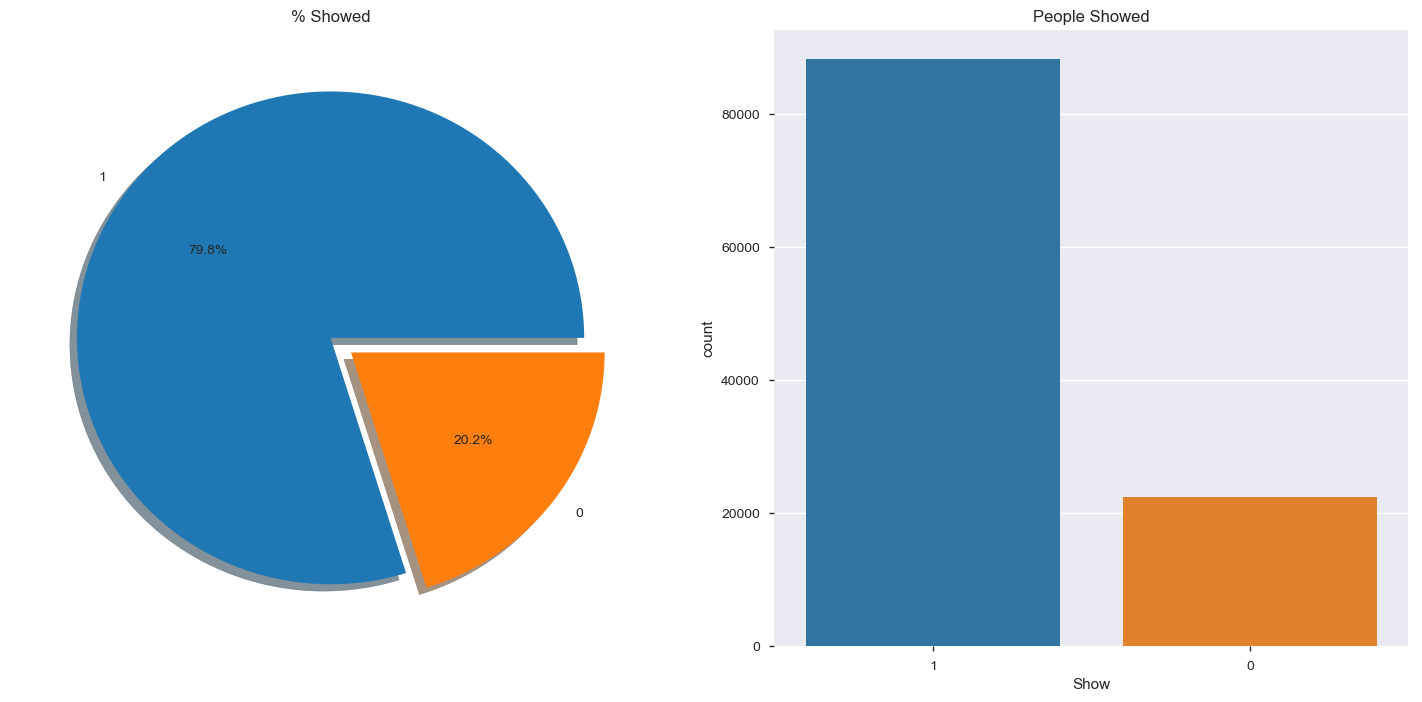

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
medapp['Show'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Showed')
ax[0].set_ylabel('')
sns.countplot('Show', order = medapp['Show'].value_counts().index, data=medapp,ax=ax[1])
ax[1].set_title('People Showed')
plt.show()

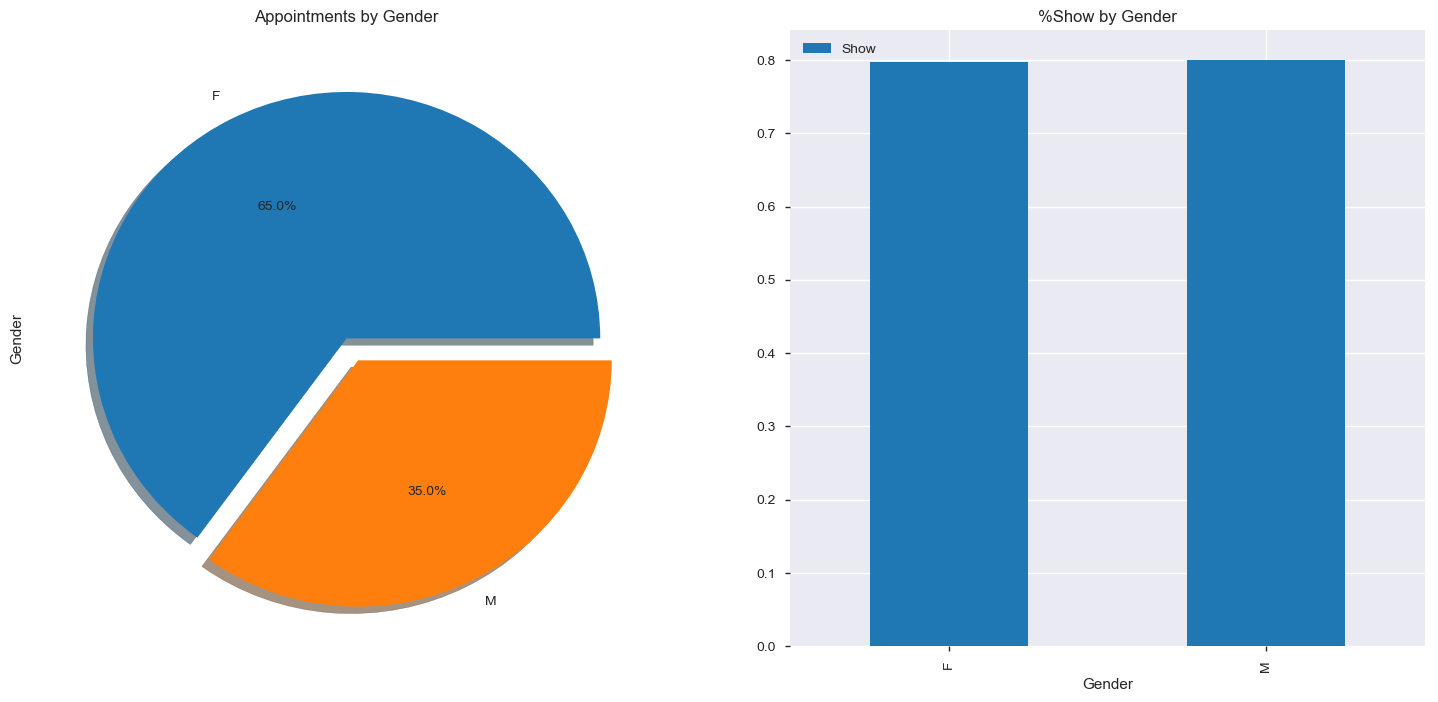

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
medapp[['Gender','Show']].groupby(['Gender']).mean().plot.bar(ax=ax[1])
ax[0].set_title('Appointments by Gender')
medapp['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('%Show by Gender') 

plt.show()

As can be seen, almost 80% of the patientes showed up to their appointments. Both men and women have a similar attendance of nearly 80%, but the total ammount of women that goes to the doctor is far superior. 

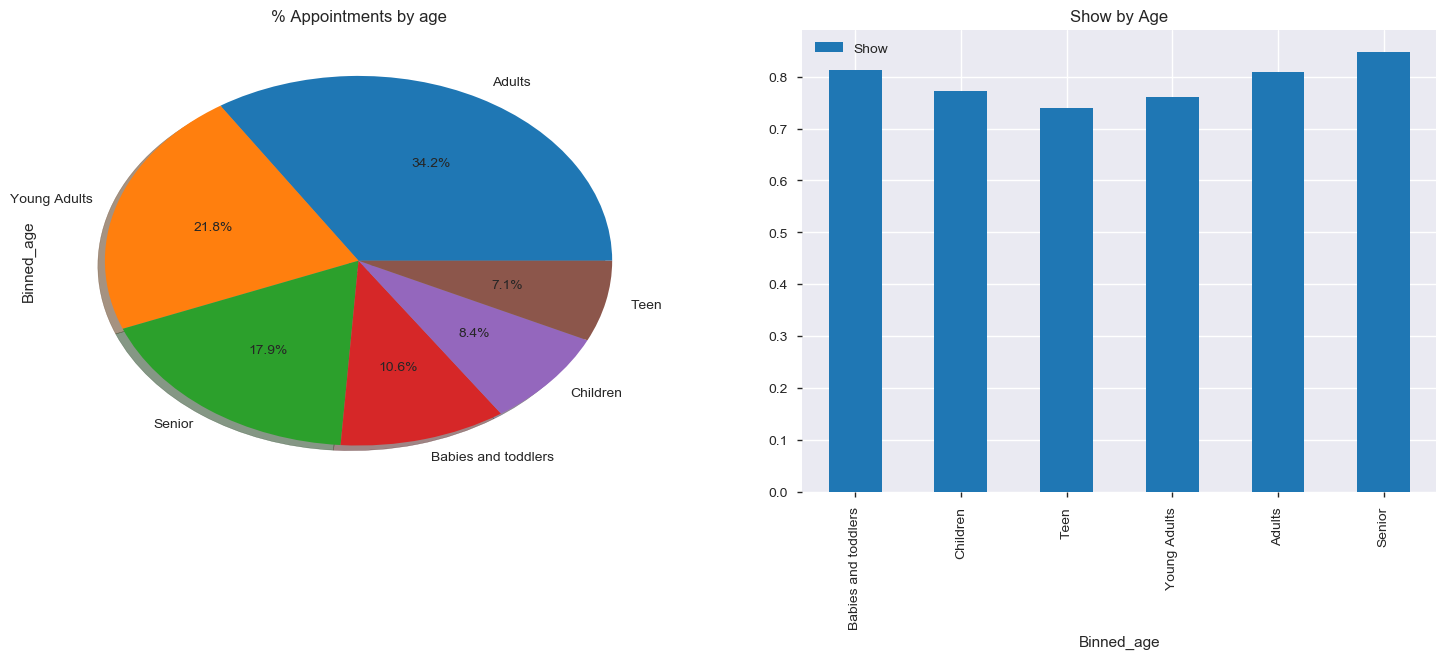

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,6))
medapp['Binned_age'].value_counts().plot.pie(explode=[0,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Appointments by age')
medapp[['Binned_age','Show']].groupby(['Binned_age']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Show by Age')
plt.show()

In [22]:
medapp.groupby(["Binned_age"])['Show'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Show
Binned_age,
Babies and toddlers,0.813741
Children,0.772034
Teen,0.739558
Young Adults,0.761688
Adults,0.808993
Senior,0.848133


Regarding the age of the patients, it can be seen as Adults, Young adults and Seniors are the most frequent, with 74% of the total. However, 1 of every 4 young adults and teens (groups representing 29% of the total) don't show to their appointments. Is there a relationship between age, gender and attendance?

In [23]:
gender_age = medapp.groupby(['Binned_age',"Gender"])['Show'].count()
gender_age_pcts = gender_age.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
print(gender_age_pcts)

Binned_age           Gender
Babies and toddlers  F        47.77
                     M        52.23
Children             F        47.48
                     M        52.52
Teen                 F        62.98
                     M        37.02
Young Adults         F        72.99
                     M        27.01
Adults               F        68.83
                     M        31.17
Senior               F        67.15
                     M        32.85
Name: Show, dtype: float64


In [24]:
medapp.groupby(['Binned_age',"Gender"])['Show'].mean().to_frame().style.background_gradient(cmap='summer_r')

There seems to not be a relationship between those three variables, since most of the Male/Female groups have similar attendance percentages, regardless of age. It can also be noted that male teens have the lowest attendance rate, with 73%. 

# Wait period and SMS

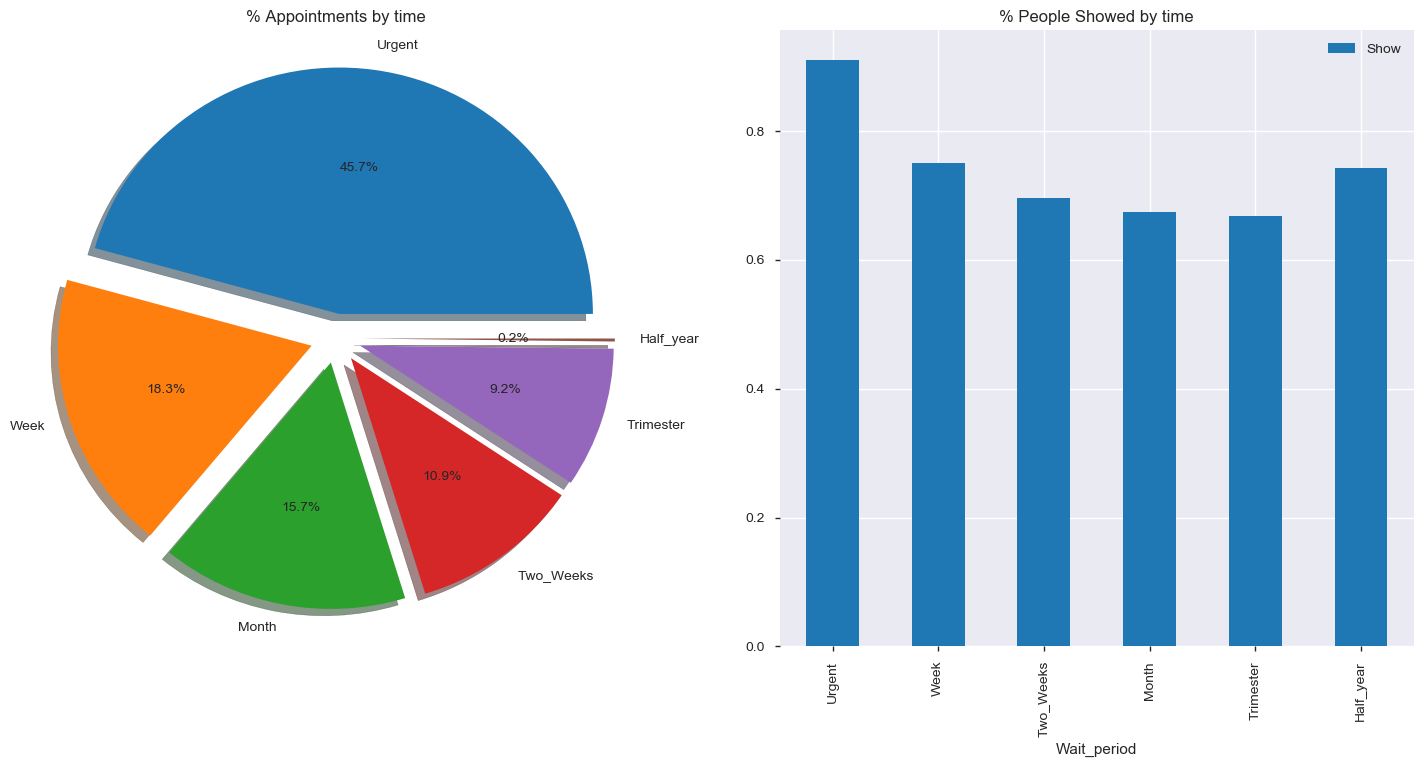

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
medapp['Wait_period'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Appointments by time')
ax[0].set_ylabel('')
medapp[['Wait_period','Show']].groupby(['Wait_period']).mean().plot.bar(ax=ax[1])
ax[1].set_title('% People Showed by time')
plt.show()

In [26]:
medapp.groupby(["Wait_period"])['Show'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Show
Wait_period,
Urgent,0.910814
Week,0.75021
Two_Weeks,0.695323
Month,0.674093
Trimester,0.668504
Half_year,0.741935


In [27]:
medapp.groupby(['Wait_period',"Binned_age"])['Show'].mean().to_frame().style.background_gradient(cmap='summer_r')

Almost 46% of the appointments are considered urgent (same day, 1 day, two days), representing 64% of the appointments that take place in the same week they were requested. Urgent appointments have an attendancy of over 90%, while appointments happening in a period between a week and the next three months (31% of the total) have much lower attendancy rates. 

It can be seen how as the waiting period increases, the attendance plunges in Children, Teen and Young Adults categories, so the waiting period can be considered as an important factor for attendance. 

In [28]:
wait_sms = medapp.groupby(['Wait_period',"SMS_received"])['SMS_received'].count()

wait_sms_pcts = wait_sms.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

print(wait_sms_pcts)

Wait_period  SMS_received
Urgent       0              100.00
Week         0               42.95
             1               57.05
Two_Weeks    0               41.77
             1               58.23
Month        0               39.44
             1               60.56
Trimester    0               38.28
             1               61.72
Half_year    0               35.94
             1               64.06
Name: SMS_received, dtype: float64


In [29]:
medapp.groupby(['SMS_received',"Wait_period"])['Show'].mean().to_frame().style.background_gradient(cmap='summer_r')

Urgent appointments have a 91% attendance even without sending SMS's. However, as waiting time increases, sending an SMS's reminder increases the attendance between 2,8 and 7,5%. Appointments with over half a year of waiting time have better attendance without SMS's reminder, but the sample is small (0,2% of the total) and we are going to disregard this result. 

In [30]:
# We substract the group of urgent appointments to find those more suitable to be reminded
not_urgent = medapp.loc[medapp['Wait_period'] != "Urgent"]
age_sms = not_urgent.groupby(["Binned_age",'SMS_received'])['SMS_received'].count()
age_sms_pcts = age_sms.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
print(age_sms_pcts)

Binned_age           SMS_received
Babies and toddlers  0              44.27
                     1              55.73
Children             0              41.86
                     1              58.14
Teen                 0              42.91
                     1              57.09
Young Adults         0              38.61
                     1              61.39
Adults               0              39.60
                     1              60.40
Senior               0              43.22
                     1              56.78
Name: SMS_received, dtype: float64


In [31]:
not_urgent.groupby(['Binned_age',"SMS_received"])['Show'].mean().to_frame().style.background_gradient(cmap='summer_r')

Young adults and Adults are the demographic groups that receive most SMS reminders, with over 60% of reminders. However, only 66% of young adults and 65% of teenagers will show up even if they receive said SMS. 

## 2.2 Analysis limitation

### This analysis is meant to be brief and simple to comply with the requeriments of the assignment. There is more to be analyzed within the current dataset, but there are some complications to it. 

1. *PatientID*, even if now is not an exponential number, there are serious concerns about the validity of the data. With proper data we could analyze how often certain individuals go to the doctor, how do they shape the attendance rating, if these people that go more often to the doctor because have severe medical conditions, access to scholarship or any other reason, etc. 
2. We don't have *hour data* for when the medical appointment is going to take place. Do people attend more in the middle of the day? In the morning? weekday attendance (not shown, but analyzed) is around 80% during the week, but could there be some day/hour where people forget they have an appointment (f.instance, monday morning or friday afternoon).
3. There's no information about when the patients receive the SMS's reminders, just that they don't receive SMS's if the appointment is going to be in the next 48 hours from the request. With this information we could calculate the best moment to send the reminder, or, in the case of long waiting periods, propose sending reminders once they reach a certain waiting time. 
4. There is data about lasting medical conditions (diabetes, alcoholism, hypertension), but not about the *nature of the appointment*. While this data is useful to see how much of the population has diabetes and how often they go to the doctor, we cannot determine if they go because they have these conditions or any other reason. We can't either know if certain medical specialties have lesser attendance rates. 
5. *Handicap level* is not a trustworthy variable for the condition severity. In the documentation's example we can see how blindness and paralysis has an score of 2, but there are different degrees of handicap related to these illnesses. 
6. There is data about the neighbourhoods where the medical attention is delivered, but there is no information about the *neighbourhoods disposition in a map*, how many hospitals are there per 1000 habitants in each neighbourhood and so on. In next lesson there is some data wrangling with Google Maps that might be useful to have an idea if there is any hospital cluster people go more to and identify how is the medical services situation in the city, which could help finding optimal future hospital locations. 

# 3. Conclusion

The analysis shows that receiving an SMS causes higher attendance to the appointments scheduled, so increasing the number of SMS sent will unquestionably rise the attendance rates. Taking into account the different demographic groups and the divergence in the attendance rates, the expected improvement in medical appointment attendance would be between 4 and 6% just by sending SMS to everyone. 